In [25]:
from common import sns_cm, get_set, display_accuracy, scatter_plot
import import_ipynb as ipynb
import os
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

##### Change directories and load Lab 1

In [26]:
%%capture
os.chdir("../Lab 1")
lab_1 = ipynb.NotebookLoader().load_module('lab1')
os.chdir("../Lab 2")

# Required Preparations

In [27]:
lab_2_positions = ['Sitting', 'Running', 'Jumping', 'Squats']

##### 'recordings' are used if we want to plot each recording.

In [28]:
recordings : dict[str: pd.DataFrame] = lab_1.read_recordings(positions=lab_2_positions)

##### merger() will read files based on the positions and concatenate the acceleratometer and rate_gyro columns, and a return a dictionary.

In [29]:
merged_dfs: dict = lab_1.merger(positions=lab_2_positions, remove_n=0)
lab_1.split_train_test_sets(processed_dataframes=merged_dfs)

##### Display the four classes

In [30]:
class_dfs = lab_1.merge_recordings_by_rows(classes=lab_2_positions)

In [31]:
print(*class_dfs, sep='\n')

            ax        ay        az        gx        gy        gz    class
0    -2.004288 -1.069891 -9.671490 -0.000458  0.002291  0.003665  Sitting
1    -1.987538 -1.077069 -9.657133 -0.000458  0.002291  0.003665  Sitting
2    -1.982753 -1.081855 -9.649955  0.004429 -0.001374  0.004887  Sitting
3    -1.989931 -1.079462 -9.645169  0.003207  0.001069  0.004887  Sitting
4    -1.989931 -1.057927 -9.642776  0.004429  0.001069  0.002443  Sitting
...        ...       ...       ...       ...       ...       ...      ...
3071 -2.044966 -0.581456 -9.676275  0.003207  0.001069  0.002443  Sitting
3072 -2.035395 -0.581456 -9.704989  0.003207  0.002291  0.002443  Sitting
3073 -2.035395 -0.593420 -9.721740  0.003207  0.003512  0.002443  Sitting
3074 -2.033002 -0.600598 -9.731311  0.003207  0.004734  0.002443  Sitting
3075 -2.030609 -0.610170 -9.721740  0.003207  0.003512  0.003665  Sitting

[3076 rows x 7 columns]
            ax         ay         az        gx        gy        gz    class
0     1.184

# Classification of different positions

#### We will use the K-nearest neighbor algorithm and decision trees in this lab. In this part you should only work with the stationary positions:
- Standing
- Sitting
- Laying down

In [32]:
stationary_positions : list[str] = ['Standing_up', 'Sitting', 'Laying_down']

In [33]:
training_sets = get_set(positions=stationary_positions, folder='Class Dataframes')
testing_sets = get_set(positions=stationary_positions, folder='Test')

In [34]:
testing_set = (pd.concat(testing_sets, axis='rows'))
df = (pd.concat(training_sets, axis='rows'))

#### We start with working with the KNN algorithm. You should use crossvalidation for evaluating the model.

In [35]:
knn = KNeighborsClassifier()

In [36]:
df

,ax,ay,az,gx,gy,gz,class
0,0.102592,-0.543171,-9.910772,0.004887,-0.001833,-0.005345,Laying_down
1,0.095414,-0.538385,-9.954143,-0.000000,-0.003054,-0.006567,Laying_down
2,0.061914,-0.519243,-9.978070,-0.003665,0.001833,-0.005345,Laying_down
3,0.066700,-0.497707,-9.903594,-0.007330,0.003054,-0.004123,Laying_down
4,0.021236,-0.492921,-9.970892,-0.007330,-0.001833,-0.000458,Laying_down
...,...,...,...,...,...,...,...
3063,-2.806183,-9.434899,0.062812,-0.003665,0.040927,-0.005345,Standing_up
3064,-2.825325,-9.430114,0.038883,-0.003665,0.028710,-0.002902,Standing_up
3065,-2.815754,-9.427721,-0.008973,-0.003665,0.012828,-0.000458,Standing_up
3066,-2.796612,-9.420543,-0.047258,-0.006108,-0.004276,0.001985,Standing_up


In [37]:
X = df.drop('class', axis='columns')
y = df['class']

##### Make a choice of the number of subsets that you use for your crossvalidation. Motivate the choice

In [38]:
folds = KFold(n_splits=20)

#### For the gridsearch use GridSearchCV which you find in the previous weeks ́ exercise. The hyperparameter you will use for the gridsearch is k, that is the number of neighbours.

##### Make a choice of the range of k-values you will use. Motivate the choice.
Too large K values will 'classify' each instance of 'df'.

In [39]:
k_range = list(range(1, 50))

##### Split data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

##### Train the model.

In [41]:
grid = GridSearchCV(estimator=knn,
                    param_grid=dict(n_neighbors=k_range),
                    cv=folds,
                    scoring='accuracy',
                    return_train_score=False)

In [42]:
grid_search = grid.fit(X=X_train, y=y_train)

##### What is the optimal k-value?

In [43]:
grid.best_params_

{'n_neighbors': 1}

##### What is the accuracy?

In [44]:
grid.best_score_

1.0

In [45]:
scores = pd.DataFrame(grid.cv_results_)

##### Display scores

In [46]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005967,0.000589,0.007059,0.000802,1,{'n_neighbors': 1},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.007327,0.004268,0.011206,0.005341,2,{'n_neighbors': 2},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.007230,0.001067,0.008226,0.000962,3,{'n_neighbors': 3},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.006204,0.000684,0.007960,0.000693,4,{'n_neighbors': 4},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.006174,0.000393,0.007616,0.000587,5,{'n_neighbors': 5},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,0.006063,0.000749,0.007426,0.000565,6,{'n_neighbors': 6},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
6,0.006391,0.001069,0.007638,0.000709,7,{'n_neighbors': 7},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
7,0.006037,0.000590,0.007319,0.000479,8,{'n_neighbors': 8},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
8,0.005964,0.000635,0.007756,0.000721,9,{'n_neighbors': 9},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
9,0.006419,0.000838,0.008502,0.000980,10,{'n_neighbors': 10},1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


##### Plot the accuracy as a function of the k-value. You need to extract that information from the model. How sensitive is the performance of the model for different k-values?

In [47]:
mean_test_score = scores['mean_test_score']

In [48]:
mean_test_score

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
Name: mean_test_score, dtype: float64

<Axes: title={'center': 'Accuracy'}, xlabel='k'>

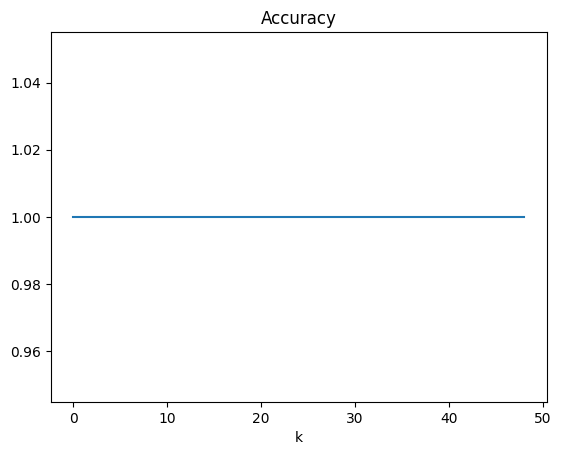

In [49]:
mean_test_score.plot(title = 'Accuracy', xlabel='k')

#### Now it is time to look at the test set with the optimal k-value

##### Use the model on the test set and acquire both the accuracy and the plot the confusion matrix

In [50]:
y_pred = grid.predict(X=X_test)

In [51]:
accuracy_score(y_true=y_test, y_pred=y_pred)

1.0

In [52]:
X_test_sample = testing_set.drop('class', axis='columns')
y_true_sample = testing_set['class']
y_test_pred = grid.predict(X=X_test_sample)

In [53]:
display_accuracy(accuracy_score(y_true=y_test, y_pred=y_pred), accuracy_score(y_true=y_true_sample, y_pred=y_test_pred))

Validation set accuracy: 1.0
Test set accuracy: 1.0


##### Explain the result in the confusion matrix

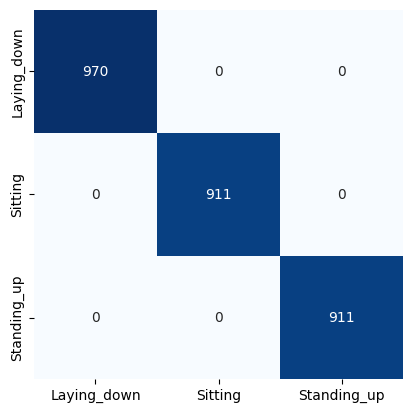

In [54]:
sns_cm(y_test, y_pred)

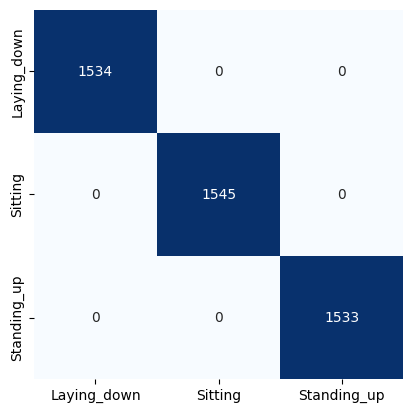

In [55]:
sns_cm(y_true_sample, y_test_pred)

##### Scatter plot of training sets
The accelerometer values are spaced quite apart, and easily distinguishable. Hence, the 100% accuracy

<Axes: xlabel='ax', ylabel='ay'>

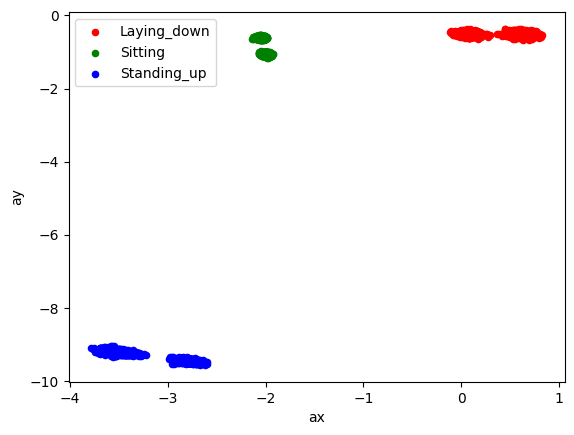

In [56]:
scatter_plot(training_sets)

##### Scatter plot of testing sets
The same goes for the testing sets

<Axes: xlabel='ax', ylabel='ay'>

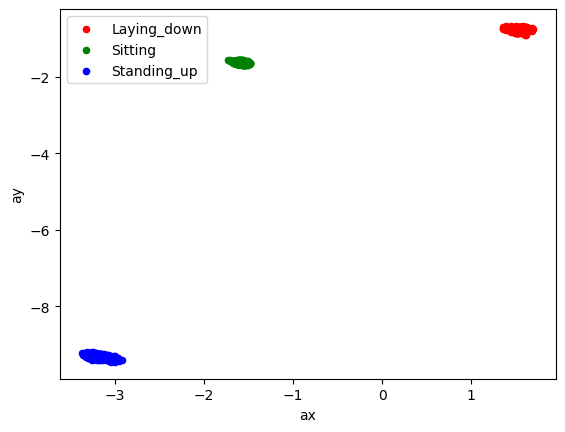

In [58]:
scatter_plot(testing_sets)